In [1]:
from autoeval_server.resultparser.loadresults import EvalTaskResultInfo, list_models
from autoeval_server.leaderboard.display import get_leaderboard_df_data
from config import RESULTS_SAVE_ROOT as results_save_root
from eval_and_dumping_result import LEADERBOARDTASK_REGISTRY
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import pandas as pd

In [25]:
pd_stats = pd.read_pickle('../board.pkl')

In [29]:
pd_stats

,Model Name,next token argmax choices acc,next token argmax all acc,next token argmax choices circular acc,next token argmax all circular acc,acc,acc norm,ppl argmin acc,rank_next token argmax choices acc,rank_next token argmax all acc,rank_next token argmax choices circular acc,rank_next token argmax all circular acc,rank_acc,rank_acc norm,rank_ppl argmin acc
0,WizardLM/WizardLM-13B-V1.2,53.4,53.4,30.2,30.2,35.6,36.1,35.9,9.0,8.0,7.0,7.0,11.0,9.0,9.0
1,WizardLM/WizardLM-70B-V1.0,62.7,62.6,42.1,42.0,38.2,37.2,37.6,2.0,2.0,2.0,2.0,2.0,4.0,4.0
2,WizardLM/WizardLM-7B-V1.0,26.9,0.0,0.0,0.0,22.9,25.6,24.2,23.0,25.0,24.0,24.0,24.0,24.0,24.0
3,Xwin-LM/Xwin-LM-13B-V0.1,53.9,53.9,27.2,27.1,36.6,36.5,35.9,7.0,7.0,11.0,11.0,6.0,7.0,9.0
4,Xwin-LM/Xwin-LM-70B-V0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Xwin-LM/Xwin-LM-7B-V0.1,45.5,45.5,16.1,16.1,33.8,34.3,34.1,14.0,14.0,16.0,16.0,17.0,18.5,19.5
6,chavinlo/alpaca-13b,39.5,37.8,14.8,13.7,38.0,37.4,38.7,20.0,20.0,17.0,18.5,3.5,3.0,1.5
7,chavinlo/alpaca-native,40.8,40.7,13.7,13.7,34.7,35.3,35.4,19.0,18.0,19.0,18.5,13.5,13.0,14.0
8,gpt2,22.9,0.2,0.0,0.0,NaN,NaN,NaN,25.0,24.0,24.0,24.0,NaN,NaN,NaN
9,huggyllama/llama-13b,43.5,43.1,14.4,14.3,34.4,35.0,34.4,17.0,17.0,18.0,17.0,15.0,16.0,18.0


In [28]:
columns = [
    'next token argmax choices acc',
    'next token argmax all acc',
    'next token argmax choices circular acc',
    'next token argmax all circular acc',
    'acc',
    'acc norm',
    'ppl argmin acc',
]


for col in columns:
    pd_stats[f'rank_{col}'] = pd_stats[f'{col}'].rank(ascending=False)


In [33]:

rank_columns = [f'rank_{col}' for col in columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'rank by metric')

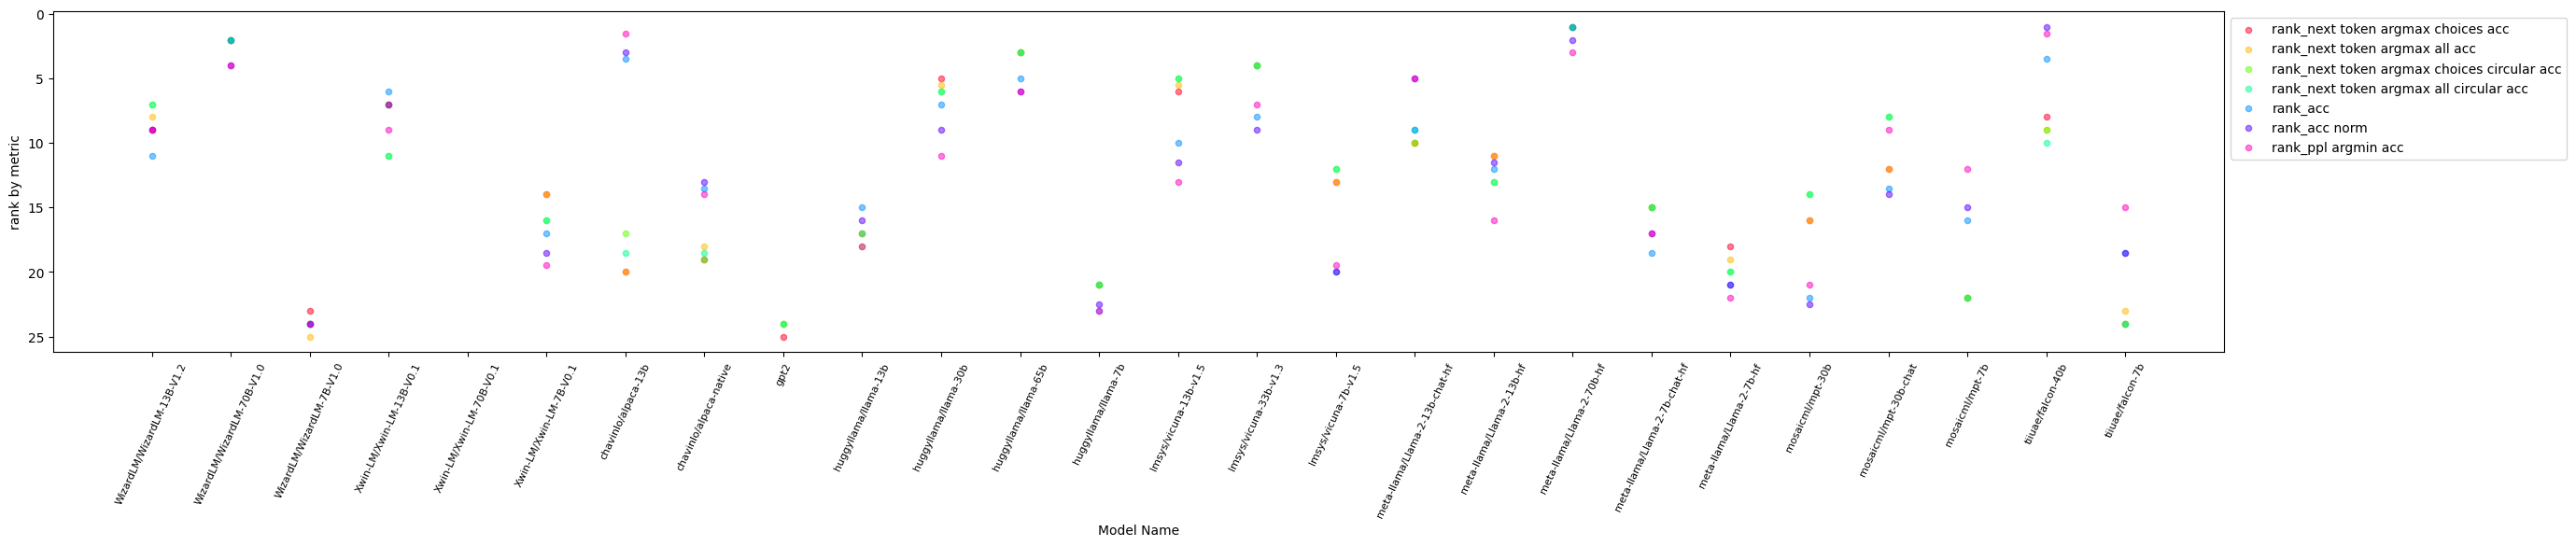

In [79]:
cm = plt.get_cmap('gist_rainbow')
colors = cm(np.linspace(0, 1.0, len(rank_columns)))

ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[0], label=rank_columns[0], c=colors[0], alpha=0.5)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[1], label=rank_columns[1], c=colors[1], alpha=0.5, ax=ax1)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[2], label=rank_columns[2], c=colors[2], alpha=0.5, ax=ax1)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[3], label=rank_columns[3], c=colors[3], alpha=0.5, ax=ax1)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[4], label=rank_columns[4], c=colors[4], alpha=0.5, ax=ax1)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[5], label=rank_columns[5], c=colors[5], alpha=0.5, ax=ax1)
ax1 = pd_stats.plot.scatter(x='Model Name', y=rank_columns[6], label=rank_columns[6], c=colors[6], alpha=0.5, ax=ax1)
ax1.set_ylim(ax1.get_ylim()[::-1])
plt.xticks(rotation=65)
plt.xticks(fontsize=8)
plt.subplots_adjust(bottom=0.15) 
fig = ax1.get_figure()
fig.set_size_inches(30, 5)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel('rank by metric')

# plt.tight_layout()

